For two-month stints, residents from the Mayo Clinic Urology Department do a rotation at Children's Minneapolis. In order to arm residents and their families with the best tool for promoting safety––information––I am conducting analyses of criminal activity in and around the Whittier neighborhood. The location of the temporary residence is the Murals of LynLake (44.951130601589234, -93.28785887942821), which provides enough space for a small family and allows pets (with a per-pet fee). One parking spot is included; additional parking spots may be rented. As we will see, it may be prudent to avoid street parking if residents and their families are bringing more than one car.

Let's begin.

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Load data
df = pd.read_csv("Crime_Data.csv",low_memory=False,index_col="OBJECTID")
# Display overall data structure
display(df.head(20))

df['Offense_Category']=df['Offense_Category'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df['Occurred_Date'] = pd.to_datetime(df['Occurred_Date'])

display(df.info())


,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Problem_Final,Address,Precinct,Neighborhood,Ward,Latitude,Longitude,wgsXAnon,wgsYAnon,Crime_Count
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,-93.315904,44.996096,Additional Crime Metrics,19-001979,MP20191979,2019/01/03 00:09:00+00,2019/01/02 21:55:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0016XX VINCENT AVE N,4.0,Willard - Hay,5.0,44.99610,-93.31590,-1.038788e+07,5.620907e+06,1
2,-93.310826,45.021371,Additional Crime Metrics,19-016104,MP201916104,2019/01/17 03:03:00+00,2019/01/17 02:36:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic with Weapons (P),0036XX RUSSELL AVE N,4.0,Cleveland,4.0,45.02137,-93.31083,-1.038731e+07,5.624887e+06,1
3,-93.313518,45.049415,Additional Crime Metrics,19-026241,MP201926241,2019/01/27 19:50:00+00,2019/01/27 18:17:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Stabbing (PE),0025XX 52ND AVE N,4.0,Shingle Creek,4.0,45.04941,-93.31352,-1.038761e+07,5.629304e+06,1
4,-93.306123,44.896520,Additional Crime Metrics,19-032882,MP201932882,2019/02/03 18:03:00+00,2019/02/03 17:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0059XX NEWTON AVE S,5.0,Armatage,13.0,44.89652,-93.30612,-1.038679e+07,5.605245e+06,1
5,-93.241592,45.025836,Additional Crime Metrics,19-036236,MP201936236,2019/02/07 03:15:00+00,2019/02/06 22:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic with Weapons (P),0012XX 32ND AVE NE,2.0,Waite Park,1.0,45.02584,-93.24159,-1.037961e+07,5.625590e+06,1
6,-93.264536,44.944730,Additional Crime Metrics,19-045570,MP201945570,2019/02/16 01:49:00+00,2019/02/16 00:45:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Assault in Progress (P),0007XX 32ND ST E,3.0,Central,9.0,44.94473,-93.26454,-1.038216e+07,5.612825e+06,1
7,-93.301181,45.029455,Additional Crime Metrics,19-058764,MP201958764,2019/03/01 06:23:00+00,2019/03/01 05:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Burglary Dwlng In Progress (P),0017XX 41ST AVE N,4.0,Webber - Camden,4.0,45.02946,-93.30118,-1.038624e+07,5.626160e+06,1
8,-93.273381,44.960900,Additional Crime Metrics,19-066854,MP201966854,2019/03/09 03:02:00+00,2019/03/08 21:43:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse-In Progress (P),0002XX 22ND ST E,5.0,Whittier,10.0,44.96090,-93.27338,-1.038315e+07,5.615368e+06,1
9,-93.275367,44.950150,Additional Crime Metrics,19-081415,MP201981415,2019/03/22 14:24:00+00,2019/03/18 12:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Domestic Abuse Report Only (P),0029XX STEVENS AVE,5.0,Whittier,10.0,44.95015,-93.27537,-1.038337e+07,5.613677e+06,1


<class 'pandas.core.frame.DataFrame'>
Index: 258765 entries, 1 to 258765
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   X                    258765 non-null  float64            
 1   Y                    258765 non-null  float64            
 2   Type                 258765 non-null  object             
 3   Case_Number          258765 non-null  object             
 4   Case_NumberAlt       223201 non-null  object             
 5   Reported_Date        258765 non-null  object             
 6   Occurred_Date        258764 non-null  datetime64[ns, UTC]
 7   NIBRS_Crime_Against  258765 non-null  object             
 8   NIBRS_Group          258765 non-null  object             
 9   NIBRS_Code           258765 non-null  object             
 10  Offense_Category     258765 non-null  category           
 11  Offense              258765 non-null  object             
 12  Problem

None

In [2]:
# Checking for missing values in crucial columns
missing_values = df.isnull().sum()
# Check for duplicates
duplicated_values = df.duplicated()
# If the Offense_Category, 
print(missing_values)
df_clean = df.dropna(axis=0,subset=['Neighborhood','Occurred_Date'])
df_clean.info()

X                          0
Y                          0
Type                       0
Case_Number                0
Case_NumberAlt         35564
Reported_Date              0
Occurred_Date              1
NIBRS_Crime_Against        0
NIBRS_Group                0
NIBRS_Code                 0
Offense_Category           0
Offense                    0
Problem_Initial        49204
Problem_Final          49204
Address                   68
Precinct                1625
Neighborhood            1704
Ward                    1844
Latitude                   0
Longitude                  0
wgsXAnon                   0
wgsYAnon                   0
Crime_Count                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 257060 entries, 1 to 258765
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   X                    257060 non-null  float64            
 1   Y                   

/Users/M118684/Library/Mobile Documents/com~apple~CloudDocs/MSP Crime Stats/msp_crime_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat_diff'] = (df['Latitude'] - center_lat) * (math.pi / 180) * 111  # 111 km per degree of latitude
/Users/M118684/Library/Mobile Documents/com~apple~CloudDocs/MSP Crime Stats/msp_crime_functions.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon_diff'] = ((df['Longitude'] - center_lon) * (math.pi / 180) * 111
/Users/M118684/Library/Mobile Documen

,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Neighborhood,Ward,Latitude,Longitude,wgsXAnon,wgsYAnon,Crime_Count,lat_diff,lon_diff,distance_km
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,-93.315904,44.996096,Additional Crime Metrics,19-001979,MP20191979,2019/01/03 00:09:00+00,2019-01-02 21:55:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Willard - Hay,5.0,44.99610,-93.31590,-1.038788e+07,5.620907e+06,1,0.087120,-0.038446,0.095226
2,-93.310826,45.021371,Additional Crime Metrics,19-016104,MP201916104,2019/01/17 03:03:00+00,2019-01-17 02:36:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Cleveland,4.0,45.02137,-93.31083,-1.038731e+07,5.624887e+06,1,0.136076,-0.031495,0.139673
3,-93.313518,45.049415,Additional Crime Metrics,19-026241,MP201926241,2019/01/27 19:50:00+00,2019-01-27 18:17:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Shingle Creek,4.0,45.04941,-93.31352,-1.038761e+07,5.629304e+06,1,0.190398,-0.035183,0.193622
4,-93.306123,44.896520,Additional Crime Metrics,19-032882,MP201932882,2019/02/03 18:03:00+00,2019-02-03 17:00:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Armatage,13.0,44.89652,-93.30612,-1.038679e+07,5.605245e+06,1,-0.105798,-0.025037,0.108720
5,-93.241592,45.025836,Additional Crime Metrics,19-036236,MP201936236,2019/02/07 03:15:00+00,2019-02-06 22:00:00+00:00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,Waite Park,1.0,45.02584,-93.24159,-1.037961e+07,5.625590e+06,1,0.144736,0.063437,0.158028


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_61429/4042727038.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_radius["Offense_Category"] = df_radius["Offense_Category"].str.strip()
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_61429/4042727038.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_radius_filt['Offense_Category'] = pd.Categorical(df_radius_filt['Offense_Category'], categories=offense_type, ordered=True)


Text(0.5, 1.0, 'Number of crimes in 1 mile radius around Murals from 2019-2023')

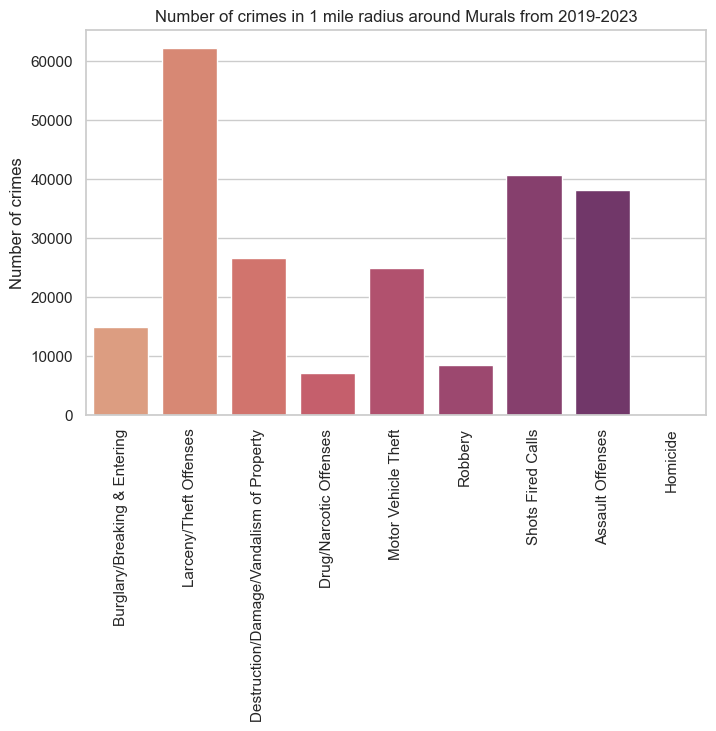

In [8]:
from msp_crime_functions import filter_within_radius

# Let's look at total crimes by all neighborhoods and then focus on whittier
total_crimes_byhood = df.groupby(by=['Neighborhood','Offense_Category'])['Crime_Count'].sum()

# Center point coordinates: The Murals of LynLake
center_lat, center_lon = 44.951130601589234, -93.28785887942821
df_radius = filter_within_radius(df_clean,center_lat,center_lon,1.6)
# Display the result
display(df_radius.head())
# Pick relevant offenses and plot
offense_type = ["Burglary/Breaking & Entering","Larceny/Theft Offenses","Destruction/Damage/Vandalism of Property", "Drug/Narcotic Offenses","Motor Vehicle Theft","Robbery","Shots Fired Calls","Assault Offenses", "Homicide"]
df_radius["Offense_Category"] = df_radius["Offense_Category"].str.strip()
df_radius_filt = df_radius.loc[df_radius["Offense_Category"].isin(offense_type)]
df_radius_filt['Offense_Category'] = pd.Categorical(df_2kmrad_filt['Offense_Category'], categories=offense_type, ordered=True)
# countplot for overall crimes
sns.set_context('notebook')
cntplt = sns.catplot(kind='count',data=df_radius,x="Offense_Category",palette='flare')
cntplt.set_xticklabels(rotation=90)
plt.xlabel(None)
plt.ylabel("Number of crimes")
plt.title("Number of crimes in 1 mile radius around Murals from 2019-2023")


                  X          Y                      Type Case_Number  \
OBJECTID                                                               
1        -93.315904  44.996096  Additional Crime Metrics   19-001979   
2        -93.310826  45.021371  Additional Crime Metrics   19-016104   
3        -93.313518  45.049415  Additional Crime Metrics   19-026241   
4        -93.306123  44.896520  Additional Crime Metrics   19-032882   
5        -93.241592  45.025836  Additional Crime Metrics   19-036236   

         Case_NumberAlt           Reported_Date             Occurred_Date  \
OBJECTID                                                                    
1            MP20191979  2019/01/03 00:09:00+00 2019-01-02 21:55:00+00:00   
2           MP201916104  2019/01/17 03:03:00+00 2019-01-17 02:36:00+00:00   
3           MP201926241  2019/01/27 19:50:00+00 2019-01-27 18:17:00+00:00   
4           MP201932882  2019/02/03 18:03:00+00 2019-02-03 17:00:00+00:00   
5           MP201936236  2019/02/

['Subset of NIBRS Assault Offenses', 'Larceny/Theft Offenses ', 'Assault Offenses ', 'Fraud Offenses ', 'Motor Vehicle Theft ', ..., 'Homicide Offenses ', 'Extortion/Blackmail ', 'Gunshot Wound Victims', 'Shots Fired Calls', 'Subset of NIBRS Robbery']
Length: 23
Categories (27, object): ['Animal Cruelty ', 'Arson ', 'Assault Offenses ', 'Bribery ', ..., 'Stolen Property Offenses ', 'Subset of NIBRS Assault Offenses', 'Subset of NIBRS Robbery', 'Weapon Law Violations ']

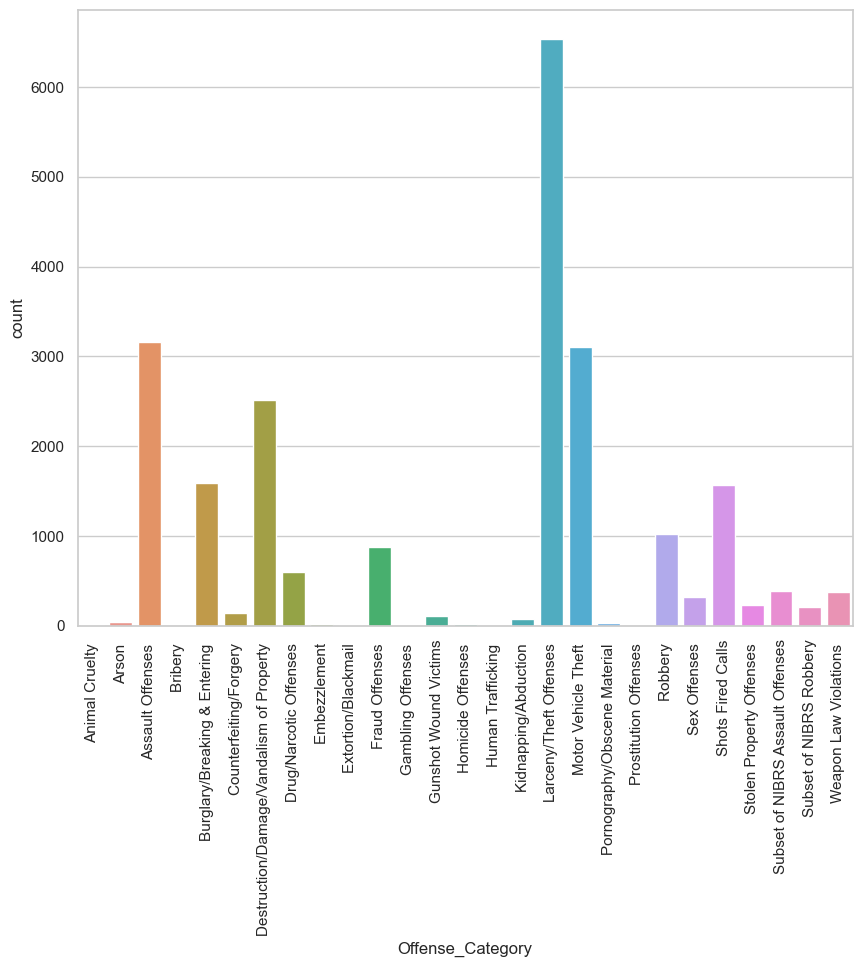

In [131]:

# Subset for Whittier
df_whittier = df_clean[df_clean['Neighborhood']=='Whittier']
# Subset for Whittier + Nearby Neighborhoods
adjacent_neighborhoods = ['Whittier','Lyndale','Uptown','Stevens Square','Lowry Hill East','Powderhorn']
df_whittierarea = df_clean.loc[df_clean['Neighborhood'].isin(adjacent_neighborhoods)]

# fig, ax = plt.subplots(figsize=(10,8))
# sns.countplot(data=df_whittierarea,x="Offense_Category")
# # plt.bar(total_crimes_byhood.loc)
# ax.tick_params(axis='x',rotation=90)

df_whittierarea["Offense_Category"].unique()

Not all of this criminal activity is useful or relevant for our purposes. Let's make a list of the stuff we care about.


/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_51245/1053974766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whittierarea["Offense_Category"] = df_whittierarea["Offense_Category"].str.strip()
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_51245/1053974766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whittierarea_filtered['Offense_Category'] = pd.Categorical(df_whittierarea_filtered['Offense_Category'], categories=offense_type, ordered=True)
/Users/M118684/anaconda

Text(0.5, 12.44444444444443, '')

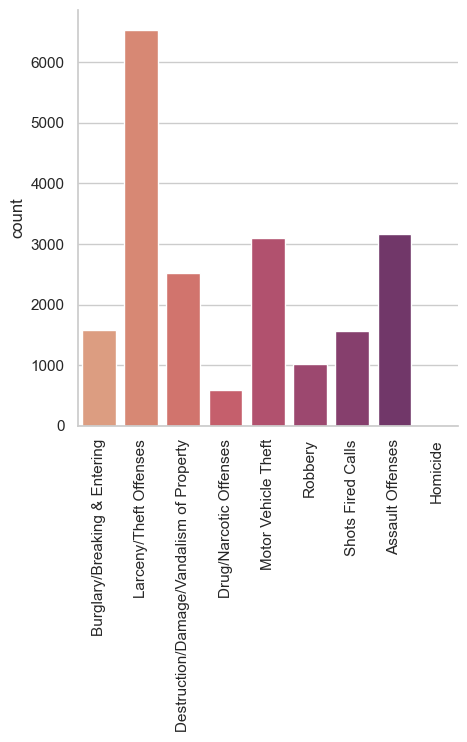

In [128]:
offense_type = ["Burglary/Breaking & Entering","Larceny/Theft Offenses","Destruction/Damage/Vandalism of Property", "Drug/Narcotic Offenses","Motor Vehicle Theft","Robbery","Shots Fired Calls","Assault Offenses", "Homicide"]
df_whittierarea["Offense_Category"] = df_whittierarea["Offense_Category"].str.strip()
df_whittierarea_filtered = df_whittierarea.loc[df_whittierarea["Offense_Category"].isin(offense_type)]
df_whittierarea_filtered['Offense_Category'] = pd.Categorical(df_whittierarea_filtered['Offense_Category'], categories=offense_type, ordered=True) 
# display(df_whittierarea_filtered.info())
# Plot the data we care about
# fig, ax = plt.subplots(figsize=(10,8))
sns.set_context('notebook')
cntplt = sns.catplot(kind='count',data=df_whittierarea_filtered,x="Offense_Category",palette='flare')
cntplt.set_xticklabels(rotation=90)
plt.xlabel(None)
plt.ylabel("Number of crimes")
plt.title("Number of crimes in Whittier")
# plt.bar(total_crimes_byhood.loc)
# ax.tick_params(axis='x',rotation=90)

OBJECTID
161                         Larceny/Theft Offenses
162                         Larceny/Theft Offenses
170                         Larceny/Theft Offenses
171                         Larceny/Theft Offenses
197                         Larceny/Theft Offenses
                            ...                   
258714                      Larceny/Theft Offenses
258734                            Assault Offenses
258744    Destruction/Damage/Vandalism of Property
258749                      Larceny/Theft Offenses
258758    Destruction/Damage/Vandalism of Property
Name: Offense_Category, Length: 20085, dtype: object

In [4]:

# idxNA = df[df["neighborhood"] == "** NOT ASSIGNED **"].index
# df_NAremoved = df.drop(index = idxNA)
# df_NAremoved.dropna(axis=0,how='any',inplace=True)
# display(df_na.size)
df_whittier = df_NAremoved[df_NAremoved["Neighborhood"]=="Whittier"]
df_whittierarea = df_NAremoved.loc[df_NAremoved["Neighborhood"].str.contains("Whittier|Lyndale|^Uptown|Stevens Square|Lowry Hill East|Powderhorn")]
display(df_whittier.info())
display(df_whittierarea.info())

,X,Y,Type,Case_Number,Case_NumberAlt,Reported_Date,Occurred_Date,NIBRS_Crime_Against,NIBRS_Group,NIBRS_Code,...,Address,Precinct,Neighborhood,Ward,Latitude,Longitude,wgsXAnon,wgsYAnon,Crime_Count,OBJECTID
0,-93.315904,44.996096,Additional Crime Metrics,19-001979,MP20191979,2019/01/03 00:09:00+00,2019/01/02 21:55:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0016XX VINCENT AVE N,4.0,Willard - Hay,5.0,44.99610,-93.31590,-1.038788e+07,5.620907e+06,1,1
1,-93.310826,45.021371,Additional Crime Metrics,19-016104,MP201916104,2019/01/17 03:03:00+00,2019/01/17 02:36:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0036XX RUSSELL AVE N,4.0,Cleveland,4.0,45.02137,-93.31083,-1.038731e+07,5.624887e+06,1,2
2,-93.313518,45.049415,Additional Crime Metrics,19-026241,MP201926241,2019/01/27 19:50:00+00,2019/01/27 18:17:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0025XX 52ND AVE N,4.0,Shingle Creek,4.0,45.04941,-93.31352,-1.038761e+07,5.629304e+06,1,3
3,-93.306123,44.896520,Additional Crime Metrics,19-032882,MP201932882,2019/02/03 18:03:00+00,2019/02/03 17:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0059XX NEWTON AVE S,5.0,Armatage,13.0,44.89652,-93.30612,-1.038679e+07,5.605245e+06,1,4
4,-93.241592,45.025836,Additional Crime Metrics,19-036236,MP201936236,2019/02/07 03:15:00+00,2019/02/06 22:00:00+00,Non NIBRS Data,Non NIBRS Data,Non NIBRS Data,...,0012XX 32ND AVE NE,2.0,Waite Park,1.0,45.02584,-93.24159,-1.037961e+07,5.625590e+06,1,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258765 entries, 0 to 258764
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    258765 non-null  float64
 1   Y                    258765 non-null  float64
 2   Type                 258765 non-null  object 
 3   Case_Number          258765 non-null  object 
 4   Case_NumberAlt       223201 non-null  object 
 5   Reported_Date        258765 non-null  object 
 6   Occurred_Date        258764 non-null  object 
 7   NIBRS_Crime_Against  258765 non-null  object 
 8   NIBRS_Group          258765 non-null  object 
 9   NIBRS_Code           258765 non-null  object 
 10  Offense_Category     258765 non-null  object 
 11  Offense              258765 non-null  object 
 12  Problem_Initial      209561 non-null  object 
 13  Problem_Final        209561 non-null  object 
 14  Address              258697 non-null  object 
 15  Precinct         

None

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 7705 to 52064
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   neighborhood    512 non-null    object 
 1   ucrDescription  512 non-null    object 
 2   number          512 non-null    float64
 3   reportMonth     512 non-null    int64  
 4   reportYear      512 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1680 entries, 7417 to 52064
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   neighborhood    1680 non-null   object 
 1   ucrDescription  1680 non-null   object 
 2   number          1680 non-null   float64
 3   reportMonth     1680 non-null   int64  
 4   reportYear      1680 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 78.8+ KB


None

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
whittier_crime_statistics = df_whittier.groupby(["ucrDescription","reportYear"]).sum("number")
crime_statistics = df_NAremoved.groupby(["ucrDescription","reportYear"]).sum("number")

whittier_crime_statistics['number_norm'] = whittier_crime_statistics['number']/crime_statistics['number']
custom_colors = ["#FF6C22","#ff9a00","#87C4FF","#3E6D9C","#111111","#2B3499","#D71313","#64CCC5"]
sns.set_theme(context='talk', style='white', palette=custom_colors)
sns.lineplot(data=whittier_crime_statistics,x="reportYear",y="number",
             errorbar=None,hue="ucrDescription",linewidth=3)

plt.xlabel("Year")
plt.ylabel("Number of crimes")
ax.set_ylim(0,750)
# plt.ylabel("Crimes (% overall city crime)")
# ax.set_ylim(0,0.5)
plt.title("Whittier Neighborhood Crimes")
plt.legend(loc="upper right",fontsize=13)
sns.move_legend(ax,"upper right",bbox_to_anchor=(1.4,1.025))


['Willard - Hay' 'Cleveland' 'Shingle Creek' 'Armatage' 'Waite Park'
 'Central' 'Webber - Camden' 'Whittier' 'Seward' 'Folwell' 'Logan Park'
 'Phillips West' 'Lyndale' 'Standish' 'Northeast Park' 'Loring Park'
 'Hawthorne' 'Downtown West' 'Marcy Holmes' 'Powderhorn Park'
 'Bryn - Mawr' 'Ericsson' 'Windom' 'Sumner - Glenwood' 'East Phillips'
 'Wenonah' 'North Loop' 'Prospect Park - East River Road' 'Hiawatha'
 'Victory' 'Jordan' 'McKinley' 'Near - North' 'Como' 'Longfellow' 'Bryant'
 'South Uptown' 'Ventura Village' 'Lind - Bohanon' 'Holland' 'Lowry Hill'
 'Lowry Hill East' 'Diamond Lake' 'West Maka Ska' 'Midtown Phillips'
 'Bancroft' 'King Field' 'Field' 'Corcoran' 'Cedar - Isles - Dean'
 'Audubon Park' 'Harrison' 'Bottineau' 'Morris Park'
 'Nicollet Island - East Bank' 'Cedar Riverside' 'Elliot Park' 'Keewaydin'
 'East Isles' 'Howe' 'Regina' 'Marshall Terrace' 'Linden Hills' 'Cooper'
 'Fulton' 'Downtown East' 'Northrop' 'Kenwood' 'Mid - City Industrial'
 'Lynnhurst' 'Columbia Park' 'E

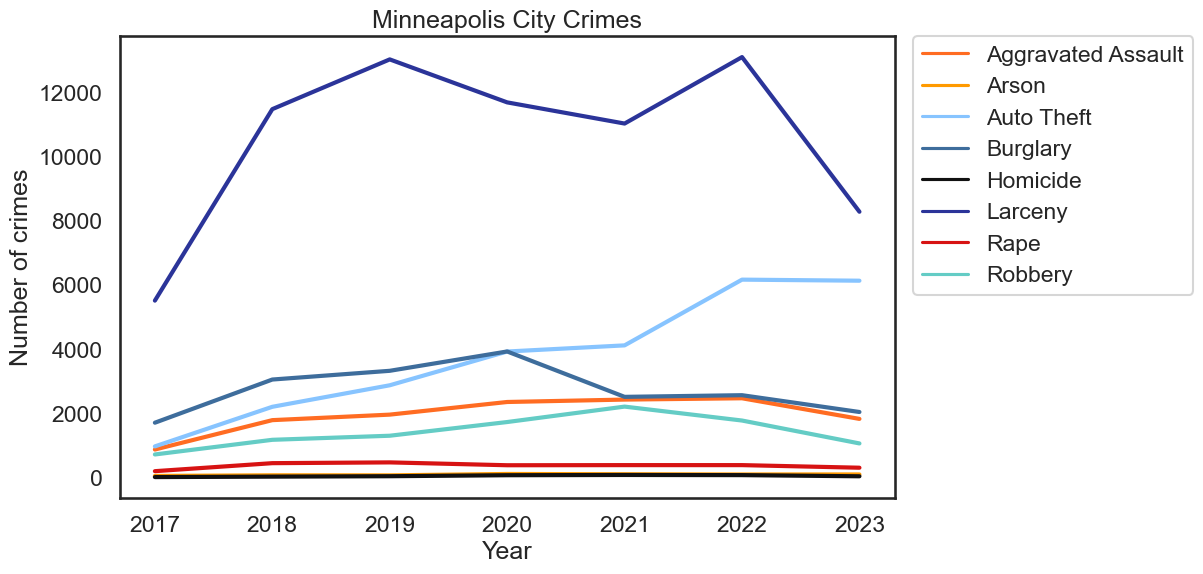

In [117]:
crime_statistics = df_NAremoved.groupby(["ucrDescription","reportYear"]).sum("number")

fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(context='talk', style='white', palette=custom_colors)
sns.lineplot(data=crime_statistics,x="reportYear",y="number",
             errorbar=None,hue="ucrDescription",linewidth=3)

plt.xlabel("Year")
plt.ylabel("Number of crimes")
plt.title("Minneapolis City Crimes")
plt.legend(loc="upper right",fontsize=13)
sns.move_legend(ax,"upper right",bbox_to_anchor=(1.4,1.025))
# ax.set_ylim(-5,1000)
# ax.set_xlim(2018,2025)
# ax.set_xticks((range(2018,2024,1)))


Compared to the overall crimes in Minneapolis, the Whittier neighborhood is extremely safe, comprising less than 0.5% of the total crimes in the city. Still, it is worth being careful, especially as far as your car is concerned. Parking within the garage is likely the best way to avoid auto theft. 

Let's take a deeper look at data from the past year ( December 2022 - November 2023)

In [131]:
df_whittier["day"] = 1
df_whittier["month"] = df_whittier["reportMonth"]
df_whittier["year"] = df_whittier["reportYear"]
df_whittier["date"] = pd.to_datetime(df_whittier[["month", "day", "year"]])
df_whittier["new_date"] = df_whittier['date'].dt.strftime('%b-%Y')

sum_crimes_permonth = df_whittier[df_whittier["reportYear"]==2023].groupby(["ucrDescription","reportMonth"])['number'].sum()
lastyear_whittierdata = df_whittier.query("date > 20220901")

/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_12462/109384919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whittier["day"] = 1
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_12462/109384919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whittier["month"] = df_whittier["reportMonth"]
/var/folders/1_/yqg6m31x7f7_1pk13q9vxwtc0000gs/T/ipykernel_12462/109384919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Text(0, 0.5, 'Monthly crimes')

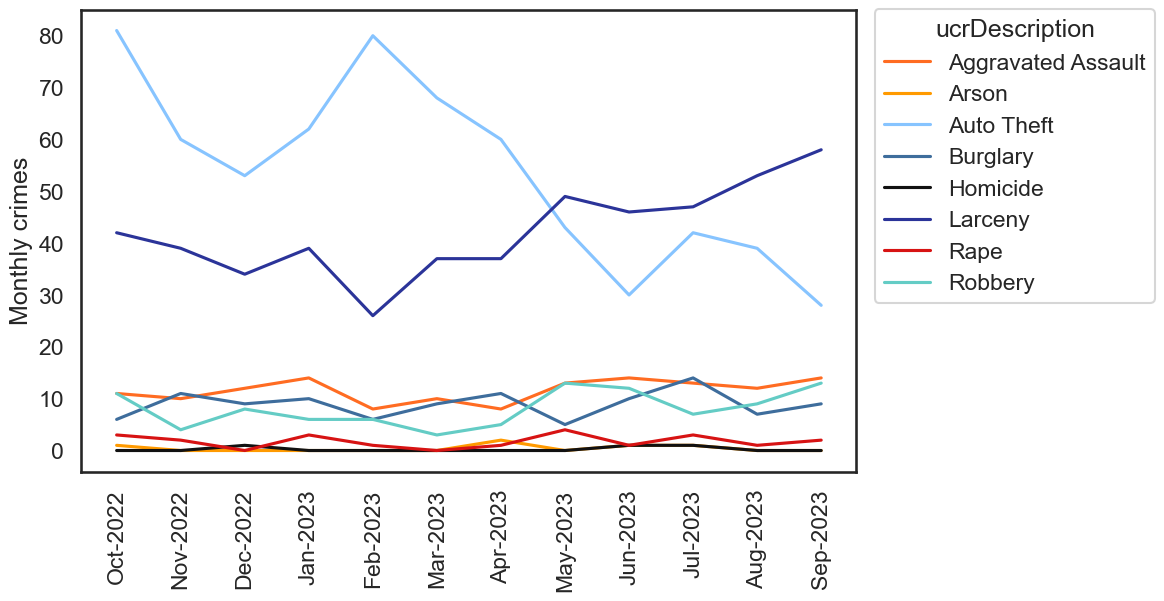

In [132]:
fig,ax= plt.subplots(figsize=(10,6))
sns.set_theme(context='talk', style='white', palette=custom_colors)
sns.lineplot(data = lastyear_whittierdata,x="new_date",y="number",hue="ucrDescription")
sns.move_legend(ax,"upper right",bbox_to_anchor=(1.4,1.025))
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel("Monthly crimes")

,neighborhood,ucrDescription,number,reportMonth,reportYear
neighborhoodCrimeStatisticsID,,,,,
1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017
2,** NOT ASSIGNED **,Arson,0.0,8,2017
3,** NOT ASSIGNED **,Auto Theft,3.0,8,2017
4,** NOT ASSIGNED **,Burglary,1.0,8,2017
5,** NOT ASSIGNED **,Homicide,0.0,8,2017
